## Imports

In [4]:
#Import Libraries
import pandas as pd
import numpy as np
from scipy.io import mmread
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import pearsonr, ranksums
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

## Data Preprocessing

In [5]:
#read in the sparse matrix
data = mmread("E-GEOD-76312.aggregated_filtered_normalised_counts.mtx")
#transform sparse matrix into pandas dataframe
data = pd.DataFrame.sparse.from_spmatrix(data)

#Loading the data can take a while

In [6]:
#load the genes (in the format of ensembl id)
gene = pd.read_csv("E-GEOD-76312.aggregated_filtered_normalised_counts.mtx_rows",delimiter = "\t",header = None)[0].values
#load the gene names
cell_id = pd.read_csv("E-GEOD-76312.aggregated_filtered_normalised_counts.mtx_cols", delimiter = "\t",header = None)[0].values

In [7]:
#transform the row and column index of the dataframe into gene ensembl and cell id respectively
data.index = gene
data.columns = cell_id

In [8]:
data.head()

,SRR3052083,SRR3052084,SRR3052085,SRR3052086,SRR3052087,SRR3052088,SRR3052089,SRR3052090,SRR3052091,SRR3052092,...,SRR5456187,SRR5456188,SRR5456189,SRR5456190,SRR5456191,SRR5456192,SRR5456193,SRR5456194,SRR5456195,SRR5456196
ENSG00000000003,1.848425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.220118,0.000000,0.000000,...,0.000000,0.0000,0.000000,1.594196,0.409923,2.122996,0.00000,0.000000,0.000000,1.246196
ENSG00000000419,0.922133,201.239100,0.000000,64.100410,1.302134,0.000000,0.000000,0.771098,127.333510,258.883200,...,0.000000,508.2891,60.324370,0.000000,1.229770,0.424553,445.82940,267.926670,0.000000,0.287090
ENSG00000000457,14.105330,45.350548,27.500156,24.328178,21.817270,15.758317,3.566042,19.376453,23.881630,37.535576,...,18.358406,1588.4178,40.131010,13.045530,34.460392,13.971558,27.20065,30.016335,12.008236,14.492656
ENSG00000000460,0.922133,0.000000,0.000000,0.000000,1.953201,1.820742,0.000000,0.771098,10.582026,0.000000,...,0.000000,0.0000,0.781743,1.438031,0.000000,0.525876,0.00000,0.000000,0.726846,0.000000
ENSG00000000938,0.000000,0.000000,0.000000,503.646100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [9]:
#The dataset contains 2151 cells with 27118 genes
data.shape

(27118, 2151)

In [10]:
X = data.T
print(X.shape)
X.head()

(2151, 27118)


,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000288393,ENSG00000288460,ENSG00000288525,ENSG00000288534,ENSG00000288547,ENSG00000288550,ENSG00000288556,ENSG00000288558,ENSG00000288564,ENSG00000288579
SRR3052083,1.848425,0.922133,14.105330,0.922133,0.0000,0.000000,0.000000,0.000000,0.000000,3.538667,...,0.0,0.0,2.7664,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
SRR3052084,0.000000,201.239100,45.350548,0.000000,0.0000,0.000000,0.698747,1.213876,20.962408,14.077494,...,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,1.397494
SRR3052085,0.000000,0.000000,27.500156,0.000000,0.0000,0.000000,0.000000,0.000000,0.401888,0.406227,...,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,5.224539
SRR3052086,0.000000,64.100410,24.328178,0.000000,503.6461,0.000000,3.052401,0.000000,0.000000,9.157202,...,0.0,0.0,0.0000,29.308508,0.0,0.0,0.0,0.0,0.0,6.104801
SRR3052087,0.000000,1.302134,21.817270,1.953201,0.0000,1.953201,0.000000,0.000000,0.651067,3.906401,...,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,0.651067


### Load the meta

In [11]:
meta =  pd.read_csv("ExpDesign-E-GEOD-76312.tsv",delimiter = "\t")

In [11]:
#Viewing the columns in meta
meta.columns

Index(['Assay', 'Sample Characteristic[organism]',
       'Sample Characteristic Ontology Term[organism]',
       'Sample Characteristic[individual]',
       'Sample Characteristic Ontology Term[individual]',
       'Sample Characteristic[age]',
       'Sample Characteristic Ontology Term[age]',
       'Sample Characteristic[organism part]',
       'Sample Characteristic Ontology Term[organism part]',
       'Sample Characteristic[cell type]',
       'Sample Characteristic Ontology Term[cell type]',
       'Sample Characteristic[facs marker]',
       'Sample Characteristic Ontology Term[facs marker]',
       'Sample Characteristic[disease]',
       'Sample Characteristic Ontology Term[disease]',
       'Sample Characteristic[clinical information]',
       'Sample Characteristic Ontology Term[clinical information]',
       'Sample Characteristic[clinical history]',
       'Sample Characteristic Ontology Term[clinical history]',
       'Factor Value[single cell identifier]',
       'Fact

In [12]:
#View the distribution of disease type of cells
meta["Sample Characteristic[disease]"].value_counts()

chronic phase chronic myeloid leukemia    1964
normal                                     187
Name: Sample Characteristic[disease], dtype: int64

## One-Hot Encoding

In [14]:
### One Hot Encoding
# type = (['normal', 'chronic phase chronic myeloid leukemia'])
y = meta["Sample Characteristic[disease]"]

# Integer mapping
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

# One hot encoding
onehot_encoder = OneHotEncoder(sparse = False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[1 1 1 ... 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
y = integer_encoded.ravel()

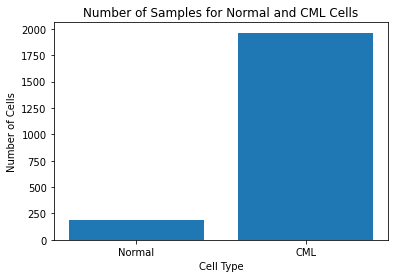

In [47]:
import matplotlib.pyplot as plt
#Visualization of the Data
#1. Show the data is unbalanced (y-axis: number of samples, x-axis: cell type, histogram)
cell_type = ['Normal', 'CML']
sample_size = [187, 1964]

type = [i for i,_ in enumerate(cell_type)]
plt.bar(type, sample_size)
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.title('Number of Samples for Normal and CML Cells')
plt.xticks(type, cell_type)
plt.show()

[33, 0, 0, 0, 0, 0, 154]
[236, 357, 302, 169, 137, 733, 30]
[269, 357, 302, 169, 137, 733, 184]


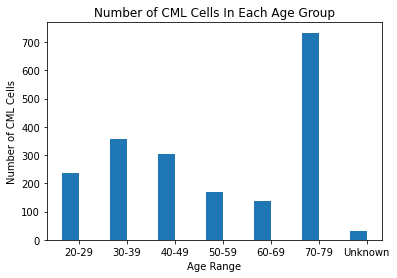

In [48]:
#2. Show the number of cml cells detected in each age group
#Get the corresponding cell type for each age entry
df1 = pd.DataFrame(
    {
        'age': meta["Sample Characteristic[age]"],
        'cell type': y
    }
)

#Group by age range
group1 = ['20 year', '22 year', '23 year', '24 year']
group2 = ['31 year', '33 year', '34 year', '35 year', '38 year',]
group3 = ['40 year', '47 year', '49 year']
group4 = ['54 year', '55 year', '57 year']
group5 = ['60 year', '61 year', '63 year']
group6 = ['70 year', '72 year', '73 year', '74 year']
group7 = ['not available year']

lst = []
lst.append(group1)
lst.append(group2)
lst.append(group3)
lst.append(group4)
lst.append(group5)
lst.append(group6)
lst.append(group7)

#Get the number of normal and cml cell for each age entry
agegroup = 1
normal_lst = []
cml_lst = []
group_pop = []
for group in lst:
    normal = 0
    cml = 0
    pop = 0
    for age in group:
        for i in range(len(df1)):
            if df1['age'][i] == age:
                pop += 1
                if df1['cell type'][i] == 1:
                    normal += 1
                else:
                    cml += 1
    normal_lst.append(normal)
    cml_lst.append(cml)
    group_pop.append(pop)
    agegroup += 1

print(normal_lst)
print(cml_lst)
print(group_pop)

#Plot
ind = np.arange(7)
width = 0.35
# plt.bar(ind, normal_lst, width, label = 'Normal')
plt.bar(ind, cml_lst, width, label = 'CML')
plt.ylabel('Number of CML Cells')
plt.xlabel('Age Range')
plt.title('Number of CML Cells In Each Age Group')
plt.xticks(ind + width / 2, ('20-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Unknown'))
# plt.legend(loc = 'best')
plt.show()


## Feature Selection

In [50]:
#Select the 100 features having the largest 100 magnitude correlation values with the class label
def corr(X,y):
    corr = []
    for i in range(len(y)):
        corr.append(abs(pearsonr(X.iloc[:,i], y)[0])) 
    c = sorted(range(len(corr)), key=lambda x: corr[x])[-100:]
    return c
c_method1 = corr(X,y)
print(c_method1)

#X with selected features
X_method1 = X.iloc[:,c_method1[-10:]]
print(c_method1[-10:])

# From the selected top 10 features, observe the correlations between features.
# Correlation map: display the correlation coefficients
X_method1.corr().style.background_gradient(cmap="Blues")

[686, 1989, 1585, 971, 781, 591, 788, 93, 246, 1247, 890, 1397, 1493, 1494, 1678, 900, 945, 67, 174, 1205, 2123, 734, 778, 1498, 2087, 1317, 363, 1854, 1934, 1388, 1806, 798, 2023, 687, 741, 855, 533, 1460, 82, 1432, 1071, 1515, 489, 1706, 1931, 1216, 1473, 1697, 148, 1979, 1393, 1095, 1939, 1647, 221, 1184, 1343, 86, 1604, 2024, 403, 776, 1307, 258, 1199, 1505, 145, 1966, 1954, 31, 326, 366, 215, 1586, 1197, 1100, 1947, 1117, 151, 928, 1793, 1311, 2005, 335, 554, 2149, 990, 204, 109, 432, 1679, 1794, 1946, 1789, 497, 577, 1108, 1514, 160, 1318]
[1679, 1794, 1946, 1789, 497, 577, 1108, 1514, 160, 1318]


,ENSG00000087086,ENSG00000089335,ENSG00000093010,ENSG00000089248,ENSG00000034510,ENSG00000042980,ENSG00000070831,ENSG00000081985,ENSG00000007062,ENSG00000076662
ENSG00000087086,1.000000,-0.004874,0.053663,0.069793,-0.052948,0.058742,0.071715,0.074830,0.062210,0.142562
ENSG00000089335,-0.004874,1.000000,-0.020912,0.018021,0.000013,-0.012647,-0.016092,-0.031570,-0.027550,0.000126
ENSG00000093010,0.053663,-0.020912,1.000000,0.063630,0.005627,0.013052,-0.019670,0.030557,0.034969,0.085683
ENSG00000089248,0.069793,0.018021,0.063630,1.000000,-0.009066,0.059407,-0.067170,0.026542,0.017909,0.139798
ENSG00000034510,-0.052948,0.000013,0.005627,-0.009066,1.000000,-0.127325,0.084873,-0.091264,-0.114975,-0.137304
ENSG00000042980,0.058742,-0.012647,0.013052,0.059407,-0.127325,1.000000,-0.004289,0.026783,0.117825,0.130174
ENSG00000070831,0.071715,-0.016092,-0.019670,-0.067170,0.084873,-0.004289,1.000000,-0.019235,-0.072706,-0.031789
ENSG00000081985,0.074830,-0.031570,0.030557,0.026542,-0.091264,0.026783,-0.019235,1.000000,0.102939,0.074329
ENSG00000007062,0.062210,-0.027550,0.034969,0.017909,-0.114975,0.117825,-0.072706,0.102939,1.000000,0.133103
ENSG00000076662,0.142562,0.000126,0.085683,0.139798,-0.137304,0.130174,-0.031789,0.074329,0.133103,1.000000


In [118]:
X_10 = list(data.index[c[-10:]])
print('Top 10 features:', X_10)

Top 10 features: ['ENSG00000087086', 'ENSG00000089335', 'ENSG00000093010', 'ENSG00000089248', 'ENSG00000034510', 'ENSG00000042980', 'ENSG00000070831', 'ENSG00000081985', 'ENSG00000007062', 'ENSG00000076662']


In [81]:
### Show that we cannot use accuracy as the performance metric
X_new = X.iloc[:,c]

#Estimate the performance of nearest neighbor classifier using k-fold cross-validation
k = 5
n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors = n_neighbors)
scores = cross_val_score(knn, X_new, y, cv=k, scoring='accuracy')
accuracy = scores.mean()
erorr_rate = 1 - accuracy

print(scores)
print('accuracy:', accuracy)
print('Error Rate:', erorr_rate)

### Accuracy is not a good measurement since the date is highly imbalanced
### Also, 1NN is too simple
### Might need to use regression

[0.91183295 0.90930233 0.90930233 0.91162791 0.91395349]
accuracy: 0.9112037986294718
Error Rate: 0.08879620137052824


In [79]:
k = 5
n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors = n_neighbors)
scores = cross_val_score(knn, X_new, y, cv=k, scoring='f1')
f1_score = scores.mean()
erorr_rate = 1 - accuracy

print(scores)
print('F-1 Score:', f1_score)
# print('Error Rate:', erorr_rate)


[0.16666667 0.26415094 0.14925373 0.21818182 0.14925373]
F-1 Score: 0.1895013781862557


In [82]:
#Select the 100 features having the largest 100 magnitude correlation values with the class label for the (k-1)/k fraction of samples
k = 5
scores_2 = []
#We will split the dataset into 4 batches, the training set will include 3 of the 4 batches, which is 3/4 of all sample data.
kf = KFold(n_splits=k, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    result1c = corr(X_train, y_train)
    #Use the selected features to classify each held-out sample
    X_selected = X_train.iloc[:,result1c]
    X_test = X_test.iloc[:,result1c]
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_selected, y_train)
    y_pred = knn.predict(X_test)
    scores_2.append(knn.score(X_test, y_test))
acc = np.mean(scores_2)
print(scores_2)
print('accuracy:', acc)

#Error Rate
err = 1- acc
print('Error Rate:', err)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[0.9187935034802784, 0.8883720930232558, 0.9023255813953488, 0.9209302325581395, 0.9209302325581395]
accuracy: 0.9102703286030325
Error Rate: 0.08972967139696753


In [22]:
#Split the data by class
index = [i for i in range(len(y)) if y[i] == 0]   #Get the set for class 0
X_class0 = data.iloc[:,index]
y_class0 = y[index]


index = [i for i in range(len(y)) if y[i] == 1]   #Get the set for class 1
X_class1 = data.iloc[:,index]
y_class1 = y[index]

In [95]:
#Select the top 100 most differentially expressed genes/features. (smallest p-value)
#Use all samples
ranksum = []
for i in range(X_class0.shape[0]):
    ranksum.append(ranksums(X_class0.iloc[i], X_class1.iloc[i]).pvalue)
result = sorted(range(len(ranksum)), key=lambda x: ranksum[x])[:100]
print(result)

#Print top 10 features
X_10 = list(X.index[result[:10]])
print('Top 10 features:', X_10)

[4013, 16958, 15245, 6745, 12052, 8295, 2335, 18467, 16764, 20813, 17674, 19906, 5696, 7000, 16161, 17470, 21983, 26334, 3520, 14127, 1318, 11792, 4513, 2573, 14320, 14781, 577, 2617, 5003, 12882, 160, 4521, 26503, 24812, 24103, 12743, 16252, 14427, 4827, 2867, 19723, 16242, 5905, 11931, 7329, 2197, 23405, 4563, 9565, 11679, 9136, 12283, 4302, 17066, 15476, 5441, 9577, 5332, 7901, 6270, 8402, 4120, 17111, 4016, 12472, 19735, 15497, 23229, 1108, 14869, 2023, 2771, 2298, 10763, 11312, 109, 5936, 19390, 23931, 7673, 9241, 8693, 24558, 14828, 204, 17049, 24660, 11670, 19668, 3292, 22509, 4971, 20718, 15987, 11256, 7981, 497, 7466, 8711, 5669]
Top 10 features: Index(['ENSG00000113369', 'ENSG00000213058', 'ENSG00000188404',
       'ENSG00000135535', 'ENSG00000170345', 'ENSG00000145708',
       'ENSG00000100906', 'ENSG00000224114', 'ENSG00000205940',
       'ENSG00000233913'],
      dtype='object')


In [97]:
#Select the most differentially expressed genes/features. (p-value <= 0.05)
#Use all sample
dict = {}
for i in range(X_class0.shape[0]):
    p = ranksums(X_class0.iloc[i], X_class1.iloc[i]).pvalue
    if p <= 0.05:
        dict[i] = p

index1 = dict.keys()


In [ ]:
print(list(index1))

In [ ]:
#Select the most differentially expressed genes/features. (adjusted p-value <= 0.03)
#Use all samples
index2 = []
for i in range(X_class0.shape[0]):
    p = ranksums(X_class0.iloc[i], X_class1.iloc[i]).pvalue
    if p <= 0.03:
        index2.append(i)

print(list(index2))

In [101]:
len(dict)

3067

In [24]:
len(index2)

2480

In [16]:
#Get the set for class 0
index = [i for i in range(len(y)) if y[i] == 0]
data_class0 = data.iloc[:,index]
y_class0 = y[index]

#Get the set for class 1
index = [i for i in range(len(y)) if y[i] == 1]
data_class1 = data.iloc[:,index]
y_class1 = y[index]

# Split Data into training and testing set
# Validation will be automatically split when evaluating model with cv
X_train0, X_test0, y_train0, y_test0 = train_test_split(data_class0.T, y_class0, test_size=0.3, shuffle=False)
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_class1.T, y_class1, test_size=0.3, shuffle=False)
X_train = pd.concat([X_train0, X_train1])
X_test = pd.concat([X_test0, X_test1])
y_train = np.concatenate((y_train0, y_train1))
y_test = np.concatenate((y_test0, y_test1))

In [17]:
import statsmodels.stats.multitest as smt
#Select the most differentially expressed genes/features. (adjusted p-value <= 0.03)
#Use only training set
# index3 = []
p_val = []
for i in range(X_train0.shape[1]):
    p = ranksums(X_train0.iloc[:,i], X_train1.iloc[:,i]).pvalue
    p_val.append(p)
    # if p <= 0.03:
    #     index3.append(i)

index4 = []
adj_p = smt.multipletests(p_val, alpha = 0.03)
for index, j in enumerate(adj_p[1]):
    if j <= 0.03: 
        index4.append(index)

# print(list(index3))
print(list(index4))

[160, 215, 366, 577, 1108, 1117, 1276, 1318, 1679, 1706, 1954, 2048, 2197, 2298, 2335, 2573, 2617, 2771, 2849, 2858, 3034, 3303, 3472, 3520, 3673, 3816, 4013, 4034, 4120, 4302, 4369, 4513, 4521, 4563, 4569, 4827, 4893, 5003, 5332, 5441, 5669, 5696, 5905, 5936, 6270, 6733, 6745, 6866, 7000, 7043, 7145, 7275, 7284, 7329, 7466, 7517, 7645, 7891, 8066, 8266, 8295, 8402, 8693, 8711, 9241, 9402, 9563, 9565, 9997, 10102, 10138, 10763, 11256, 11469, 11483, 11670, 11679, 11792, 11931, 12052, 12160, 12472, 12692, 12743, 12882, 13066, 13084, 13489, 13498, 13521, 13594, 14127, 14153, 14320, 14427, 14586, 14595, 14753, 14776, 14781, 14828, 14941, 15245, 15476, 15497, 15733, 15987, 16161, 16242, 16252, 16475, 16628, 16764, 16819, 16917, 16958, 17049, 17066, 17111, 17470, 17674, 18415, 18467, 18574, 18934, 19096, 19297, 19668, 19906, 20718, 20813, 21689, 21983, 22540, 22616, 22699, 23289, 23405, 23739, 23931, 24103, 24410, 24558, 24812, 25376, 26208, 26236, 26334, 26500, 26503, 26742]


In [18]:
result = sorted(range(len(adj_p[1])), key=lambda x: adj_p[1][x])[:10]
#Print top 10 features
X_10 = list(data.index[result])
print('Top 10 features:', X_10)


Top 10 features: ['ENSG00000100906', 'ENSG00000109321', 'ENSG00000113369', 'ENSG00000135535', 'ENSG00000145708', 'ENSG00000170345', 'ENSG00000188404', 'ENSG00000205940', 'ENSG00000213058', 'ENSG00000214263']


In [19]:
len(index4)

151

In [28]:
X.iloc[:,index4].shape

(2151, 151)

In [29]:
def corr(X,y):
    corr = []
    for i in range(X.shape[1]):
        corr.append(abs(pearsonr(X.iloc[:,i], y)[0])) 
    c = sorted(range(len(corr)), key=lambda x: corr[x])[-100:]
    return c
c = corr(X.iloc[:,index4],y)
print(c)

#X with selected features
X_corr = X.iloc[:,c[-10:]]
print(c[-10:])

# From the selected top 10 features, observe the correlations between features.
# Correlation map: display the correlation coefficients
X_corr.corr().style.background_gradient(cmap="Blues")

[48, 135, 29, 126, 10, 34, 92, 150, 2, 89, 87, 1, 141, 101, 94, 5, 42, 80, 72, 113, 21, 90, 123, 28, 56, 33, 81, 91, 65, 145, 20, 110, 67, 116, 108, 38, 106, 8, 62, 73, 71, 98, 54, 53, 36, 44, 129, 137, 13, 64, 144, 103, 63, 16, 118, 3, 109, 61, 142, 4, 31, 125, 14, 146, 43, 139, 12, 32, 23, 77, 93, 40, 41, 78, 99, 143, 104, 149, 107, 37, 84, 60, 119, 132, 0, 76, 7, 140, 15, 120, 127, 112, 79, 128, 46, 102, 130, 26, 115, 117]
[127, 112, 79, 128, 46, 102, 130, 26, 115, 117]


,ENSG00000006327,ENSG00000006007,ENSG00000005108,ENSG00000006377,ENSG00000004142,ENSG00000005801,ENSG00000006451,ENSG00000002746,ENSG00000006025,ENSG00000006047
ENSG00000006327,1.000000,-0.015254,-0.002465,-0.019514,0.016855,-0.008994,-0.009094,-0.011787,-0.007861,-0.003014
ENSG00000006007,-0.015254,1.000000,-0.007323,-0.023503,0.011977,0.037124,-0.022537,-0.017565,-0.011632,0.001146
ENSG00000005108,-0.002465,-0.007323,1.000000,-0.005179,-0.008220,-0.007486,-0.005258,-0.008240,-0.003151,-0.001075
ENSG00000006377,-0.019514,-0.023503,-0.005179,1.000000,-0.028758,0.020657,-0.006203,-0.013436,0.023046,-0.000285
ENSG00000004142,0.016855,0.011977,-0.008220,-0.028758,1.000000,0.019173,0.008636,-0.022246,0.009796,0.005295
ENSG00000005801,-0.008994,0.037124,-0.007486,0.020657,0.019173,1.000000,-0.008071,-0.019953,-0.003639,0.016690
ENSG00000006451,-0.009094,-0.022537,-0.005258,-0.006203,0.008636,-0.008071,1.000000,0.009818,-0.009812,0.006838
ENSG00000002746,-0.011787,-0.017565,-0.008240,-0.013436,-0.022246,-0.019953,0.009818,1.000000,0.009916,-0.004488
ENSG00000006025,-0.007861,-0.011632,-0.003151,0.023046,0.009796,-0.003639,-0.009812,0.009916,1.000000,-0.003991
ENSG00000006047,-0.003014,0.001146,-0.001075,-0.000285,0.005295,0.016690,0.006838,-0.004488,-0.003991,1.000000


In [43]:
X_final_features = X.iloc[:,index4].iloc[:,c]
print(X_final_features.shape)
X_10 = list(X_final_features.T.index)[-10:]
print('Top 10 features:', X_10)


(2151, 100)
Top 10 features: ['ENSG00000229091', 'ENSG00000205940', 'ENSG00000170345', 'ENSG00000230076', 'ENSG00000135535', 'ENSG00000188404', 'ENSG00000233913', 'ENSG00000113369', 'ENSG00000213058', 'ENSG00000213270']


## Model Training

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [31]:
data.iloc[index2]

,SRR3052083,SRR3052084,SRR3052085,SRR3052086,SRR3052087,SRR3052088,SRR3052089,SRR3052090,SRR3052091,SRR3052092,...,SRR5456187,SRR5456188,SRR5456189,SRR5456190,SRR5456191,SRR5456192,SRR5456193,SRR5456194,SRR5456195,SRR5456196
ENSG00000000457,14.105330,45.350548,27.500156,24.328178,21.817270,15.758317,3.566042,19.376453,23.881630,37.535576,...,18.358406,1588.417800,40.131010,13.045530,34.460392,13.971558,27.200650,30.016335,12.008236,14.492656
ENSG00000001561,1.844266,0.000000,0.000000,0.000000,0.000000,678.772640,0.255180,670.084200,1.969075,630.539100,...,262.822720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000002016,0.922133,156.519320,1.601177,112.938820,1.302134,2.913187,0.765541,1.542196,0.000000,0.823158,...,0.000000,0.363453,7.933804,0.303850,0.819847,1.273660,4.596179,1.319836,0.000000,0.287090
ENSG00000003056,434.112880,0.000000,0.803775,638.390870,511.915650,586.804600,0.510361,0.000000,1101.268600,0.000000,...,104.363120,0.000000,0.258903,479.690000,2.049616,0.424553,13.788538,290.433780,5.087919,0.287090
ENSG00000003147,256.082730,0.000000,0.189454,27.471605,1.953201,707.540340,0.510361,0.000000,1.416437,1.024247,...,9.923048,0.363634,3.373493,0.000000,185.695240,121.459470,0.000000,471.181370,1.453691,1.909870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286001,3.954249,0.000000,3.343875,16.208473,25.249277,13.889814,187.463460,13.542480,4.006792,1.240002,...,9.056852,15.438485,0.000000,3.817992,0.000000,0.000000,0.000000,0.000000,2.990777,0.000000
ENSG00000286073,4.754004,0.000000,0.000000,0.000000,1.964281,0.000000,10.490871,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000286151,143.709440,4.192482,0.401888,3.052401,222.002730,2.913187,172.218350,31.615020,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000287276,36.604362,0.000000,73.917076,40.414440,2.604268,2.061551,0.255180,0.000000,0.000000,0.411579,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.639672,120.646230,0.000000


In [72]:
X_train.shape

(1504, 27118)

In [74]:
#data with only the selected features
X_train_selected = X_train.iloc[:,index4]
X_test_selected = X_test.iloc[:, index4]

### Standard LR

0.9041731066460588


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Accuracy Score: 0.9041731066460588')

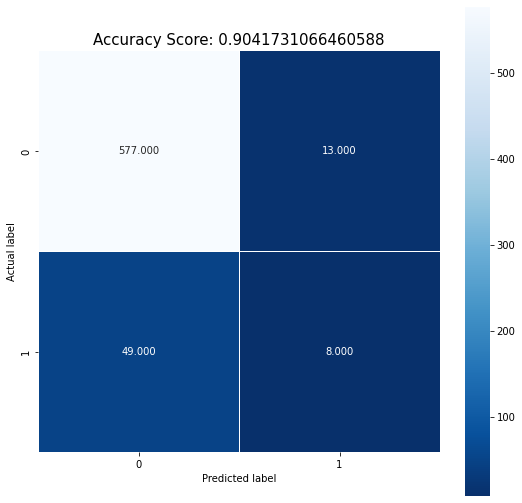

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

model = LogisticRegression().fit(X_train_selected, y_train)

#Accuracy as performance metric
pred = model.predict(X_test_selected)
score = model.score(X_test_selected, y_test)
print(score)

cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [36]:
# Fit a standard Logistic Regression model on the dataset
model = LogisticRegression(solver='lbfgs')

# Use repeated cross-validation to evaluate the model, with three repeats of 10-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, data.iloc[index3].T, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.980


### Cost-sensitive LR

0.9041731066460588


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Accuracy Score: 0.9041731066460588')

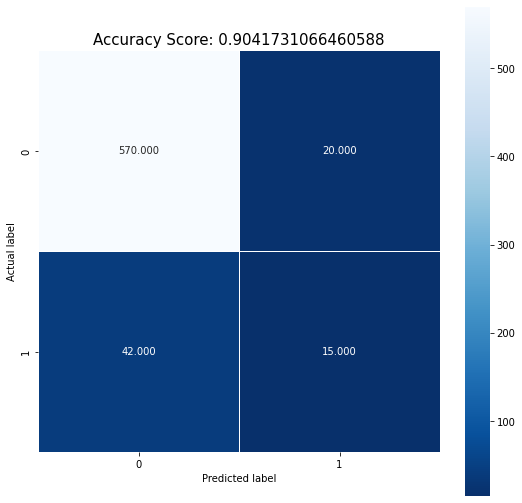

In [83]:
weights = {0:1.0, 1:10.5}
model = LogisticRegression(class_weight=weights).fit(X_train_selected, y_train)

#Accuracy as performance metric
pred = model.predict(X_test_selected)
score = model.score(X_test_selected, y_test)
print(score)

cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [43]:
# calculate class weighting
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = [0,1],
                                        y = y                                                    
                                    )
class_weights = dict(zip([0,1], class_weights))

# define model
model = LogisticRegression(solver='lbfgs', class_weight='balanced')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, data.iloc[index2].T, y, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))


Mean ROC AUC: 0.980


In [104]:
#Logistic Regression for Imbalanced Classification
# define model
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs', class_weight=weights)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X_train_selected, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print(scores)

# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))


[0.94983278 0.94927536 0.92363434 0.86566332 0.98933184 0.98371701
 0.98708591 0.94946659 0.9270073  0.96967996 0.96376812 0.93924192
 0.96098105 0.98104794 0.98315553 0.87984278 0.94216732 0.96631106
 0.99213925 0.94834363 0.8400223  0.97101449 0.97435897 0.97826087
 0.94778214 0.93823695 0.93374509 0.92195396 0.98371701 0.98933184]
Mean ROC AUC: 0.951


## Plot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.808


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


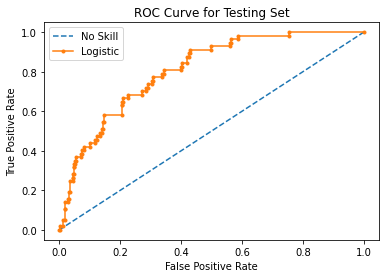

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_selected, y_train) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_selected)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.829


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


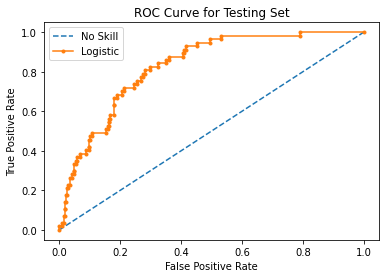

In [102]:
from sklearn.metrics import roc_curve, roc_auc_score
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_selected, y_train) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_selected)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.544


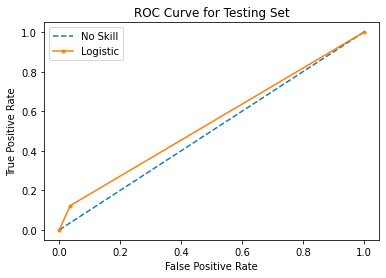

In [124]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)
lr_probs = clf.predict_proba(X_test_selected)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.638


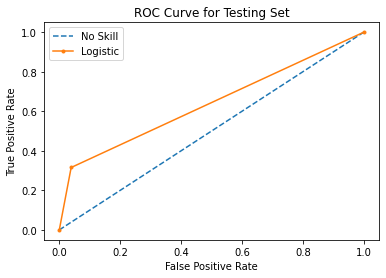

In [120]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight=weights)
clf.fit(X_train_selected, y_train)
lr_probs = clf.predict_proba(X_test_selected)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
#Plot ROC Curve
lr_probs = model.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr)
plt.title('ROC Curve for Training Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Enrichment Analysis
from scipy.stats import pearsonr, hypergeom 
# split X into 20 pathways
pathway = []
for i in range(20):
    pathway.append([x for x in range(i*10,(i+1)*10)])

n = 10
M = 200
N = 25
p_val = [0]*11
for k in range(10):
    prob = hypergeom.pmf(k,M,n,N)
    p_val[:k+1] += prob
    prob = 0
    print(p_val)

In [ ]:
enrichment = []
p_value = []
for i in range(len(pathway)):
    temp = set(pathway[i]).intersection(result)
    enrichment.append(len(temp))
    p_value.append(p_val[enrichment[-1]])
result2 = np.argpartition(enrichment, -3)[-3:]
result2 = [x+1 for x in result2]
print(result2)
p_value = [round(item,4) for item in p_value]
print(p_value)

In [46]:
#Using features selected after two types of feature selection
#Get the set for class 0
index_f = [i for i in range(len(y)) if y[i] == 0]
data_class0_f = X_final_features.iloc[index_f]
y_class0_f = y[index_f]

#Get the set for class 1
index_f = [i for i in range(len(y)) if y[i] == 1]
data_class1_f = X_final_features.iloc[index_f]
y_class1_f = y[index_f]

# Split Data into training and testing set
# Validation will be automatically split when evaluating model with cv
X_train0_f, X_test0_f, y_train0_f, y_test0_f = train_test_split(data_class0_f, y_class0_f, test_size=0.3, shuffle=False)
X_train1_f, X_test1_f, y_train1_f, y_test1_f = train_test_split(data_class1_f, y_class1_f, test_size=0.3, shuffle=False)
X_train_f = pd.concat([X_train0_f, X_train1_f])
X_test_f = pd.concat([X_test0_f, X_test1_f])
y_train_f = np.concatenate((y_train0_f, y_train1_f))
y_test_f = np.concatenate((y_test0_f, y_test1_f))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.886


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


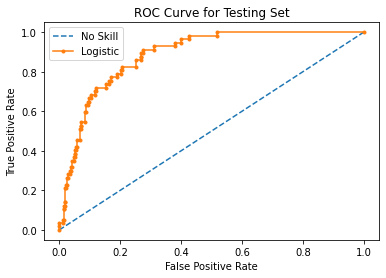

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_f, y_train) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_f)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_f))]
# calculate scores
ns_auc = roc_auc_score(y_test_f, ns_probs)
lr_auc = roc_auc_score(y_test_f, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_f, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_f, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [53]:
#Using features selected from method 1
#Get the set for class 0
index_f = [i for i in range(len(y)) if y[i] == 0]
data_class0_m1 = X_method1.iloc[index_f]
y_class0_f = y[index_f]

#Get the set for class 1
index_f = [i for i in range(len(y)) if y[i] == 1]
data_class1_m1 = X_method1.iloc[index_f]
y_class1_f = y[index_f]

# Split Data into training and testing set
# Validation will be automatically split when evaluating model with cv
X_train0_m1, X_test0_m1, y_train0_f, y_test0_f = train_test_split(data_class0_m1, y_class0_f, test_size=0.3, shuffle=False)
X_train1_m1, X_test1_m1, y_train1_f, y_test1_f = train_test_split(data_class1_m1, y_class1_f, test_size=0.3, shuffle=False)
X_train_m1 = pd.concat([X_train0_m1, X_train1_m1])
X_test_m1 = pd.concat([X_test0_m1, X_test1_m1])
# y_train_f = np.concatenate((y_train0_f, y_train1_f))
# y_test_f = np.concatenate((y_test0_f, y_test1_f))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.861


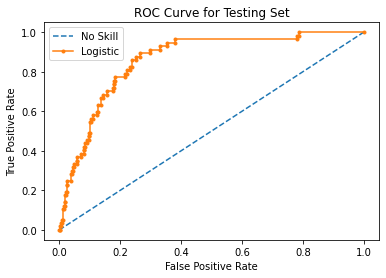

In [54]:
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m1, y_train) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_f))]
# calculate scores
ns_auc = roc_auc_score(y_test_f, ns_probs)
lr_auc = roc_auc_score(y_test_f, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_f, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_f, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [59]:
#Use correlation with splitting by class label
# Split Data into training and testing set
# Validation will be automatically split when evaluating model with cv
X_train_m1, X_test_m1, y_train_f, y_test_f = train_test_split(X_method1, y, test_size=0.3, shuffle=False)
# X_train1_m1, X_test1_m1, y_train1_f, y_test1_f = train_test_split(X_method1, y, test_size=0.3, shuffle=False)
# X_train_m1 = pd.concat([X_train0_m1, X_train1_m1])
# X_test_m1 = pd.concat([X_test0_m1, X_test1_m1])
# y_train_f = np.concatenate((y_train0_f, y_train1_f))
# y_test_f = np.concatenate((y_test0_f, y_test1_f))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.892


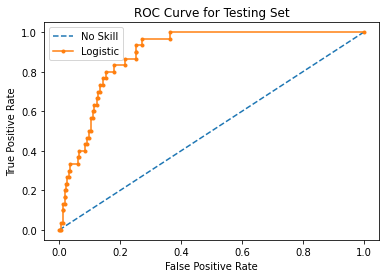

In [60]:
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m1, y_train_f) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_f))]
# calculate scores
ns_auc = roc_auc_score(y_test_f, ns_probs)
lr_auc = roc_auc_score(y_test_f, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_f, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_f, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [69]:
X_train_m1, X_test_m1, y_train_f, y_test_f = train_test_split(X, y, test_size=0.3, shuffle=True)

In [70]:
# Use training data only
#Select the 100 features having the largest 100 magnitude correlation values with the class label
def corr(X,y):
    corr = []
    for i in range(X.shape[1]):
        corr.append(abs(pearsonr(X.iloc[:,i], y)[0])) 
    c = sorted(range(len(corr)), key=lambda x: corr[x])[-100:]
    return c
c_method1 = corr(X_train_m1,y_train_f)
print(c_method1)

#X with selected features
X_method1 = X.iloc[:,c_method1]

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[25096, 26561, 25485, 13529, 13489, 26369, 25475, 25445, 25927, 26199, 25323, 25054, 26867, 20071, 25652, 13320, 25901, 26912, 25771, 20059, 13498, 25960, 26929, 22782, 25325, 22805, 26812, 24999, 25680, 26526, 26248, 25843, 25784, 26059, 20023, 26270, 25129, 25593, 26496, 26721, 25559, 13410, 26301, 26958, 25649, 26630, 13388, 25740, 13171, 22802, 22729, 26757, 27072, 25890, 26686, 13560, 26208, 13406, 25376, 26751, 26698, 26371, 26742, 25956, 26572, 26172, 25503, 25032, 24947, 26194, 25866, 25994, 26949, 22879, 23615, 26161, 20143, 25060, 23631, 26677, 13265, 27033, 20307, 25201, 26687, 26649, 25146, 22792, 12882, 26236, 24812, 23387, 26503, 24660, 19906, 22920, 19499, 25775, 25156, 17066]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.954


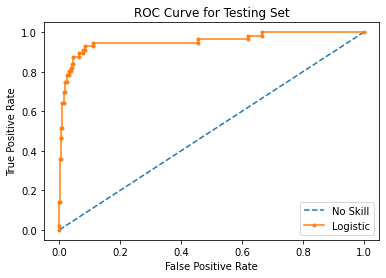

In [71]:
#Shuffle = True
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m1, y_train_f) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_f))]
# calculate scores
ns_auc = roc_auc_score(y_test_f, ns_probs)
lr_auc = roc_auc_score(y_test_f, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_f, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_f, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.928


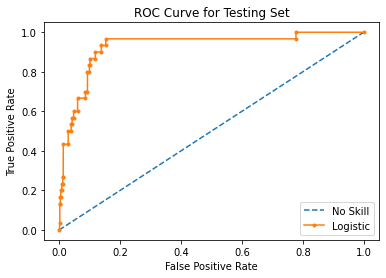

In [68]:
# Shuffle = False
weights = {0:1.0, 1:10.5}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train_m1, y_train_f) #.decision_function(X_test_selected)
lr_probs = model.predict_proba(X_test_m1)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test_f))]
# calculate scores
ns_auc = roc_auc_score(y_test_f, ns_probs)
lr_auc = roc_auc_score(y_test_f, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_f, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_f, lr_probs)
# axis labels
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker = '.', label='Logistic')
plt.title('ROC Curve for Testing Set')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()